In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np #biblioteca utilizada para trabalhar com vetores 
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas de Excel)
import seaborn as sns #bibliotecas utilizadas para criar graficos mais 'Bonitos'
import matplotlib.pyplot as plt #biblioteca para criar graficos 'comuns' ao estilo Matlab
import google

In [9]:
#abrir o arquivo csv que contem osdados a serem utilizados durante a pratica 
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [11]:
#visualizando as 5 primeiras linhas do BD 
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#verificando a exixtencia de campos nulos 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
#verificando a exixtencia de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
#adicionando valores nulos
customers_null=customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col]=np.nan

In [24]:
customers_null.info() #verificando colunas nulas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              162 non-null    float64
 1   Gender                  162 non-null    object 
 2   Age                     164 non-null    float64
 3   Annual Income (k$)      162 non-null    float64
 4   Spending Score (1-100)  162 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [26]:
#analisano dataset
customers_null.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,NaN,Male,NaN,15.0,81.0
2,3.0,Female,20.0,NaN,6.0
3,NaN,Female,23.0,16.0,77.0
4,5.0,Female,NaN,17.0,NaN
5,6.0,NaN,22.0,17.0,76.0
6,7.0,Female,35.0,NaN,6.0
7,8.0,Female,NaN,18.0,NaN
8,NaN,Male,NaN,19.0,3.0
9,NaN,Female,NaN,NaN,72.0


In [27]:
#verificando a existencia de valores nulos 
customers_null.isnull().sum()

CustomerID                38
Gender                    38
Age                       36
Annual Income (k$)        38
Spending Score (1-100)    38
dtype: int64

In [28]:
#deletando linha que possuem valores null
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
11,12.0,Female,35.0,19.0,99.0
13,14.0,Female,24.0,20.0,77.0
17,18.0,Male,20.0,21.0,66.0
19,20.0,Female,35.0,23.0,98.0
...,...,...,...,...,...
187,188.0,Male,28.0,101.0,68.0
189,190.0,Female,36.0,103.0,85.0
193,194.0,Female,38.0,113.0,91.0
195,196.0,Female,35.0,120.0,79.0


In [22]:
#preenchendo o valores nan com 10
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,0.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,0.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,0.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,0.0
198,199.0,Male,0.0,137.0,18.0


In [29]:
#encontra as estatiticas de dataset
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,164.000000,162.000000,162.000000
mean,102.814815,39.402439,61.530864,50.753086
std,58.618169,14.037076,27.237664,26.986553
min,1.000000,18.000000,15.000000,1.000000
25%,53.250000,29.000000,40.500000,29.750000
50%,104.000000,37.000000,61.500000,50.500000
75%,153.750000,49.000000,78.000000,74.500000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
#preenchendo os valores médios das colunas 
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.000000,15.000000,39.000000
1,102.814815,Male,39.402439,15.000000,81.000000
2,3.000000,Female,20.000000,61.530864,6.000000
3,102.814815,Female,23.000000,16.000000,77.000000
4,5.000000,Female,39.402439,17.000000,50.753086
...,...,...,...,...,...
195,196.000000,Female,35.000000,120.000000,79.000000
196,197.000000,Female,39.402439,126.000000,28.000000
197,198.000000,Male,32.000000,126.000000,50.753086
198,102.814815,Male,39.402439,137.000000,18.000000


In [33]:
#analiando o banco de dados 
customers.describe() #função que retorna uma analise superficial dos dados 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,164.000000,162.000000,162.000000
mean,102.814815,39.402439,61.530864,50.753086
std,58.618169,14.037076,27.237664,26.986553
min,1.000000,18.000000,15.000000,1.000000
25%,53.250000,29.000000,40.500000,29.750000
50%,104.000000,37.000000,61.500000,50.500000
75%,153.750000,49.000000,78.000000,74.500000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#count = numero de elementos de linha 
#mean = média dos valores da coluna 
#std = desvio padrão dos dados presentes na coluna 
#min = menor valor existente na coluna 
#25% = primeiro quartil dos dados 
#50% = segundo quartil dos dados 
#75% = terceiro quartil dos dados 
#max = valor maximo exixtente na coluna

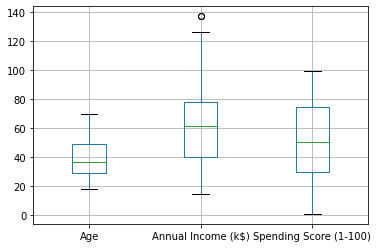

In [36]:
#constroi um boxplot para as colunas desejadas
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]) 

In [40]:
#z-score 
from scipy import stats 
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result=np.where(z > threshold)

df_salario_outlier=customers.iloc[result[0]]
#print(z)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [42]:
df_salario_outlier #todos os usuarios com salarios anuais com possiveis outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


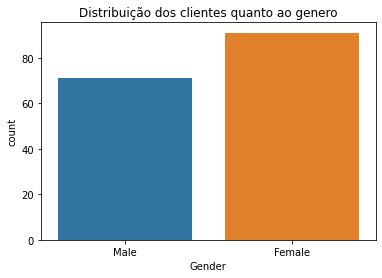

In [41]:
#analisando a distribuição dos clientes por genero
sns.countplot(x='Gender', data=customers); #cria o grafico que conta a quantidade de consumidores existente em cada um dos generos 
plt.title('Distribuição dos clientes quanto ao genero');#adiciona titulo ao grafico

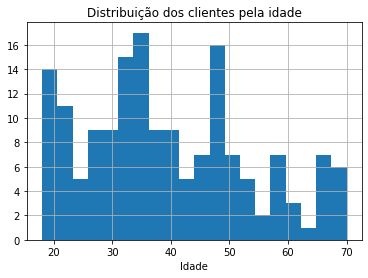

In [48]:
#analisando a distribuição do clientes quanto a idade atraves do hitograma 
customers.hist('Age', bins=20); #seleciona acoluna idade para realizar o histograma
                                #os 'bins' indicam a quantidade de grupos que se deseja dividir o dados 
plt.title('Distribuição dos clientes pela idade');# adiciona o titulo ao grafico (histograma)
plt.xlabel('Idade');

In [49]:
cat_df_customers = customers.select_dtypes(include=['object'])#copiando as colunas que são do tipo categoria 


In [50]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [53]:
#aplicando mapeamento
replace_map = {'Gender': {'Male': 1, 'Female': 2}} #define o dicionario a ser utilizado (map)
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()#encontra a lista de variaveis categoricas 
replace_map_comp = {'Gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}#deifine o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [60]:
cat_df_customers_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [61]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True)#aplica o mapeamento para dataset
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [66]:
#aplicando label encodering
#cat_df_customers_lc = customers 
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [71]:
cat_df_customers_lc=customers 

In [72]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [73]:
cat_df_customers_lc['Gender']= cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [75]:
#importando o label enconding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()#instaciando o objeto 

In [76]:
# aplicando a codificação para as colunas catgoricas 
customers_label=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [ ]:
#One Hot Encoding


In [77]:
# Get dummies 
customers_one_hot=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#customers_one_hot['Gender']=pd.Categorical(customers_one_hot['Gender'])
customers_one_hot= pd.get_dummies(customers_one_hot)
#customers_one_hot head
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [78]:
customers=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [79]:
# importe oneHotEncoder
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #isntancia o objeto 

In [81]:
# aplica o one hot encoder para a coluna
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohe.shape

NameError: name 'customer_ohe' is not defined

In [ ]:
customers_ohe